<a href="https://colab.research.google.com/github/TheoHelfenberger/notes-handson-ml/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Matrix Calculus](https://atmos.uw.edu/~dennis/MatrixCalculus.pdf)

[Details for Normal equation for linear regression](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression)

In [ ]:
import numpy as np
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

[Matplotlib](https://www.analyticsvidhya.com/blog/2020/05/10-matplotlib-tricks-data-visualization-python/)

*Normal Equation*
$$ \hat{\theta} = (X^TX)^\mathsf{-1} X^T y $$

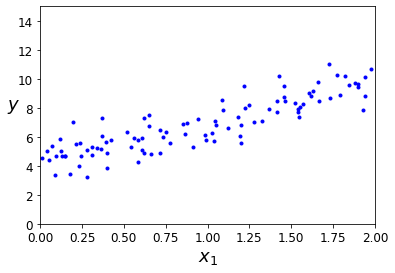

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T@X_b)@X_b.T@y
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[4.21509616],
       [9.75532293]])

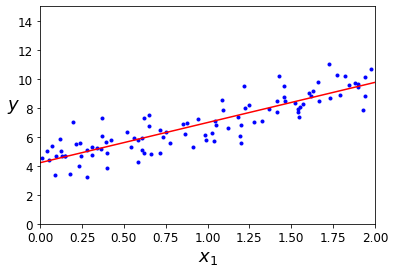

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

Uses Pseudo Inverse - Moore Penrose Inverse

In [ ]:
np.linalg.pinv(X_b)@y

array([[4.21509616],
       [2.77011339]])

$${\nabla_{\theta} MSE(\theta)} = {2\over{m}} X^T(X\theta-y)$$

$$ \theta^\mathsf{(next step)} = \theta - \eta \nabla_{\theta} MSE(\theta)$$

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

# random initialization
theta = np.random.randn(2,1)

for it in range(n_iterations):
  gradients = 2/m * X_b.T@(X_b@theta -y)
  theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

[[1.96734249]
 [0.72909213]]
array([[190.88136369],
       [165.43296694]])

m is 100


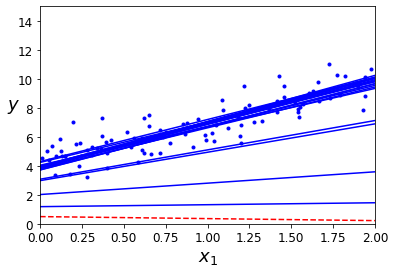

array([[4.21076011],
       [2.74856079]])

In [ ]:
theta_path_sgd = []
m = len(X_b)
print(f"m is {m}")
np.random.seed(42)

n_epochs = 50
t0,t1=5,50
# learning rate gets smaller the later in the process --> simulated annealing
def learning_schedule(t):
  return t0/(t + t1)

# random initialization
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown

plt.show()                                           # not shown
theta

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

see [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

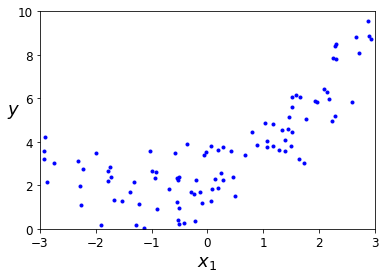

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0])


[1.97322766] [1.97322766 3.89362739]


Playing around with numbers of iterations

In [ ]:
#lin_reg = LinearRegression()
lin_reg = SGDRegressor(max_iter=10, tol=1e-3, penalty=None, eta0=0.01)
lin_reg.fit(X_poly, y.ravel())
lin_reg.intercept_, lin_reg.coef_


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


(array([1.54873635]), array([0.99951351, 0.58293803]))

In [ ]:
# Original learning rate of 0.1 does not converge
eta = 0.01
n_iterations = 10
m = len(X_poly)

# random initialization
theta = np.random.randn(3,1)

X_poly_b =  np.c_[np.ones((len(X_poly), 1)), X_poly]  # add x0 = 1 to each instance
#print(theta.shape, X_poly_b.shape)


for it in range(n_iterations):
  gradients = X_poly_b.T@(X_poly_b@theta -y)
  theta = theta - eta * 2/m * gradients

theta

array([[-0.07450793],
       [-0.35202801],
       [ 0.97539972]])

In [ ]:
thetaPseudoInverse = np.linalg.pinv(X_poly_b)@y
thetaPseudoInverse

array([[2.19573036],
       [1.00978737],
       [0.4681429 ]])

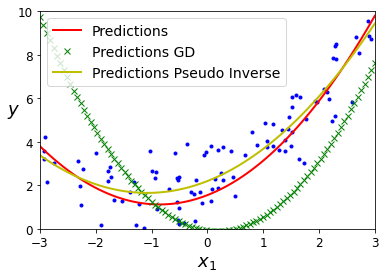

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
X_new_poly_gd_b =  np.c_[np.ones((len(X_new_poly), 1)), X_new_poly]  
y_new_gd = X_new_poly_gd_b @ theta
y_new_pseudo = X_new_poly_gd_b @ thetaPseudoInverse
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_new, y_new_gd, "gx", linewidth=2, label="Predictions GD")
plt.plot(X_new, y_new_pseudo, "y-", linewidth=2, label="Predictions Pseudo Inverse")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Regularized linerar Models

Force weigths to be small

**Ridge Regresion**
$$J(\theta) = MSE(\theta) + \alpha {1\over{2}} \sum_{i=1}^n {\theta}_i^2 $$

Closed form
$$ \hat{\theta} = (X^TX + \alpha A)^{-1} X^T y $$
where is (n+1)x(n+1) Identity matrix with $$ a_{1,1} = 0 $$

**Lasso Regression** (*Least Absolute Shrinkage and Selection Operator Regression*)
$$J(\theta) = MSE(\theta) + \alpha {1\over{2}} \sum_{i=1}^n |{\theta}_i| $$

**Elastic Net**
$$J(\theta) = MSE(\theta) + {r\alpha \over{2}} \sum_{i=1}^n |{\theta}_i| + {{1-r}\over{2}}\alpha {1\over{2}} \sum_{i=1}^n {\theta}_i^2 $$



Only use penalty term during training!

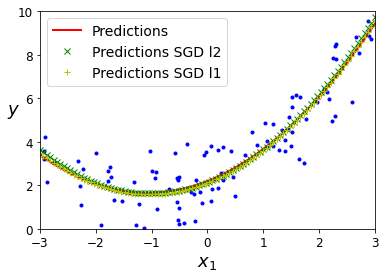

In [163]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_poly,y)
y_new = ridge_reg.predict(X_new_poly)

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X_poly, y.ravel())
y_new_sdg_l2 = sgd_reg.predict(X_new_poly)


sgd_reg_l1 = SGDRegressor(penalty="l1")
sgd_reg_l1.fit(X_poly, y.ravel())
y_new_sdg_l1 = sgd_reg_l1.predict(X_new_poly)


plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_new, y_new_sdg_l2, "gx", linewidth=2, label="Predictions SGD l2")
plt.plot(X_new, y_new_sdg_l1, "y+", linewidth=2, label="Predictions SGD l1")
#plt.plot(X_new, y_new_pseudo, "y-", linewidth=2, label="Predictions Pseudo Inverse")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()